# Landsat 8 Band Analysis

This notebook demonstrates the analysis of Landsat 8 surface reflectance bands using the farq library. It includes:

1. Loading multiple spectral bands (Blue, Green, Red, NIR, SWIR1, SWIR2) from Landsat 8 Collection 2 Level 2 data
2. Calculating basic statistics of the bands
3. Visualizing band distributions through histograms
4. Creating various plots of the bands with different visualization parameters:
   - Basic band visualization
   - Custom visualization with specific colormap, scaling, and labels
   - Reflectance-scaled visualization

The analysis focuses on a scene from path 014, row 035 captured on December 8, 2024.


In [2]:
import farq

 # Reading Functionality in Farq

 The `farq.read()` function provides a simple interface for reading geospatial raster data, particularly designed for Landsat imagery. Here are the key features:

 ## Basic Usage
```python
data, metadata = farqq.read('path/to/file.tif')
```

## Key Features
- Reads GeoTIFF and other common raster formats
- Returns both the data array and metadata dictionary
- Automatically handles nodata values
- Preserves geospatial metadata
- Memory-efficient reading for large files

## Return Values
- `data`: NumPy array containing the raster data
- `metadata`: Dictionary containing:
  - Spatial reference system
  - Geotransform parameters
  - NoData value
  - Data type
  - Band count
  - Dimensions

## Example
```python
 Read a Landsat 8 band
nir_band, meta = farqq.read('LC08_L2SP_014035_20241208_20241217_02_T1_SR_B5.TIF')
 
# Access metadata
print(f"Image dimensions: {meta['width']} x {meta['height']}")
# print(f"Projection: {meta['crs']}")
# ```

## Error Handling
The function includes robust error handling for:
- Invalid file paths
- Unsupported formats
- Corrupted files
- Memory constraints


In [3]:
# Read Landsat 8 bands
blue, meta = farq.read('LC08_L2SP_014035_20241208_20241217_02_T1_SR_B2.TIF')
green, _= farq.read('LC08_L2SP_014035_20241208_20241217_02_T1_SR_B3.TIF')
red, _ = farq.read('LC08_L2SP_014035_20241208_20241217_02_T1_SR_B4.TIF')
nir, _ = farq.read('LC08_L2SP_014035_20241208_20241217_02_T1_SR_B5.TIF')
swir1, _ = farq.read('LC08_L2SP_014035_20241208_20241217_02_T1_SR_B6.TIF')
swir2, _ = farq.read('LC08_L2SP_014035_20241208_20241217_02_T1_SR_B7.TIF')



In [4]:
farq.stats(blue)

{'min': 0.0,
 'max': 34689.0,
 'mean': 5471.799458512583,
 'std': 3964.48307712472,
 'median': 7677.0,
 'percentiles': {'0': 0.0,
  '25': 0.0,
  '50': 7677.0,
  '75': 8184.0,
  '100': 34689.0},
 'non_zero': 61242051,
 'zeros': 20645150,
 'nan': 0,
 'inf': 0,
 'valid': 61242051,
 'shape': (7891, 7761),
 'size': 61242051,
 'dtype': 'uint16',
 'range': 34689.0,
 'variance': 15717126.068808286,
 'skewness': -0.570568506238183,
 'kurtosis': -1.415346673106629,
 'percentages': {'valid': 100.0,
  'nan': 0.0,
  'zeros': 33.710742313316715,
  'inf': 0.0}}

# Visualization in Farq

The `farqq` library provides several visualization functions:

## Basic Plotting
- `farqq.plot()`: Plot a single band with customizable colormap, scaling, and colorbar
- `farqq.plot_rgb()`: Create RGB composites from three bands
- `farqq.hist()`: Plot histogram of band values

## Key Parameters
- `title`: Title for the plot
- `figsize`: Figure size in inches (width, height)
- `reflectance_scale`: Scale factor to convert DN to reflectance (e.g. 10000 for Landsat)
- `cmap`: Colormap for single band visualization
- `vmin/vmax`: Value range for color scaling
- `gamma`: Gamma correction for contrast adjustment
- `percentile`: Percentile for contrast stretching
- `scale_factor`: Additional scaling factor for visualization

## Examples
See the code cells below for examples of:
- Single band visualization with histogram
- RGB composite creation
- Custom color mapping and scaling
- Contrast enhancement


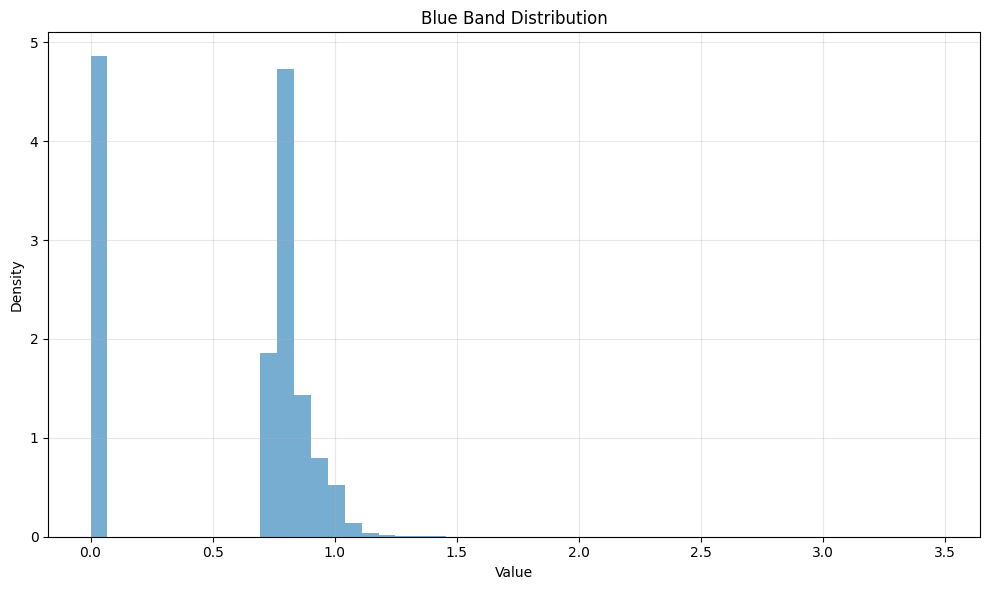

In [5]:
# Plot NIR histogram
farq.hist(blue, reflectance_scale=10000, title='Blue Band Distribution')
farq.plt.show()

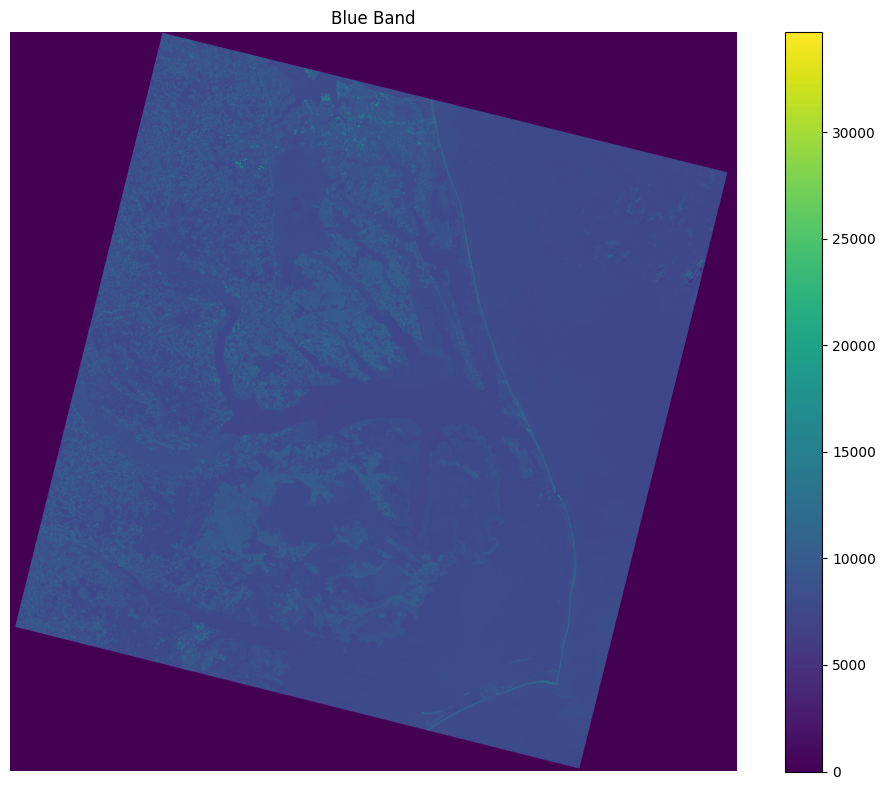

In [6]:
farq.plot(blue, title='Blue Band')
farq.plt.show()

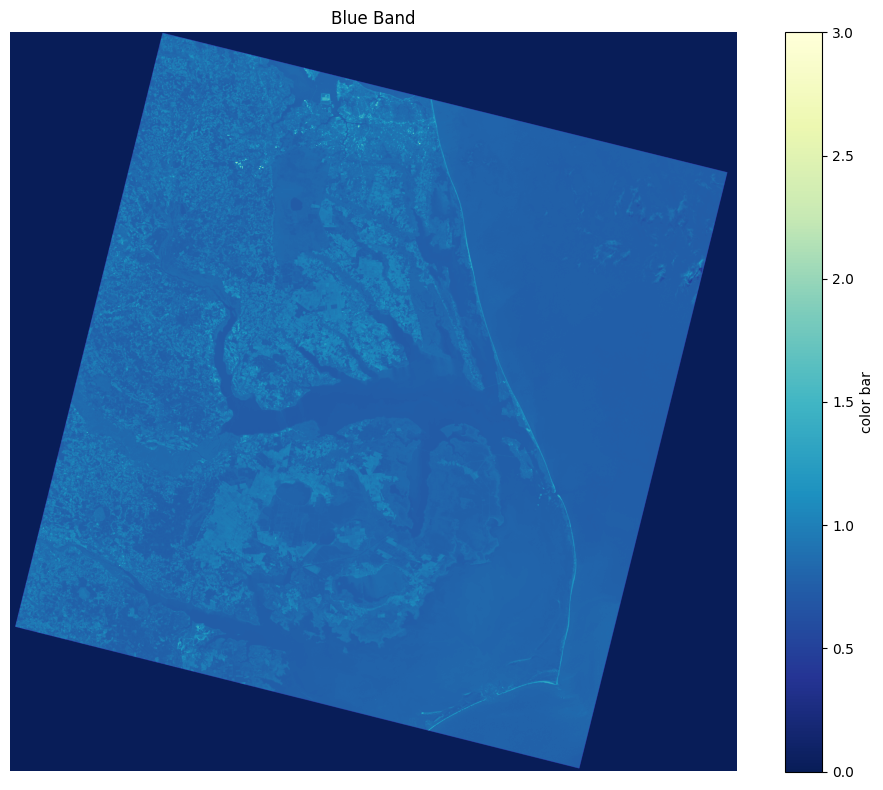

In [7]:
farq.plot(blue,
           title='Blue Band',  # Title for the plot
           cmap='YlGnBu_r',  # Colormap to use for visualization
           figsize=(10, 8),  # Width and height of figure in inches
           vmin=0,  # Minimum value for color scaling
           vmax=3,  # Maximum value for color scaling
           colorbar_label="color bar",  # Label for the colorbar
           reflectance_scale=10000)  # Scale factor to convert DN to reflectance (0-1)
farq.plt.show()

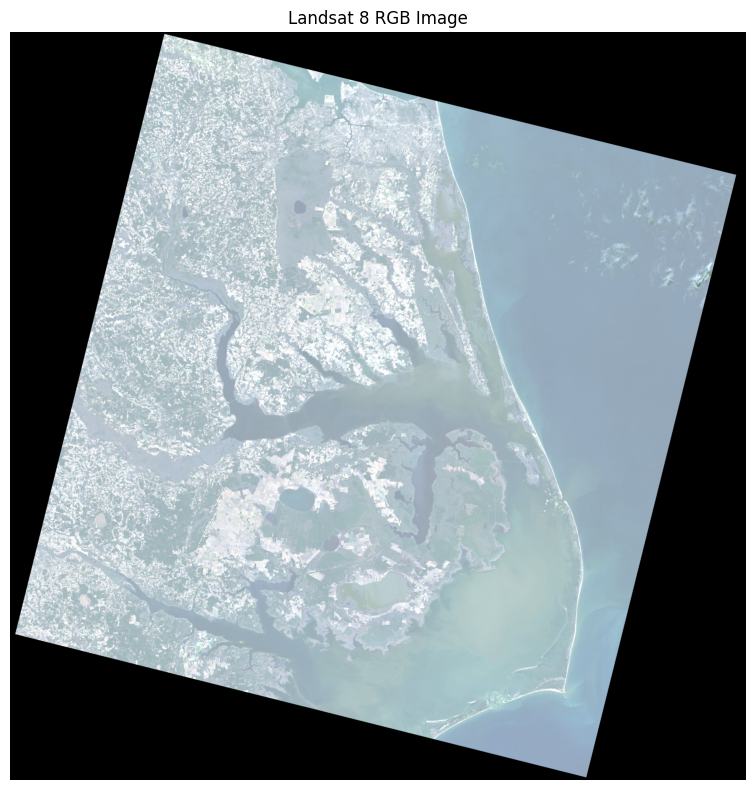

In [8]:
farq.plot_rgb(red, green, blue, title='Landsat 8 RGB Image')
farq.plt.show()

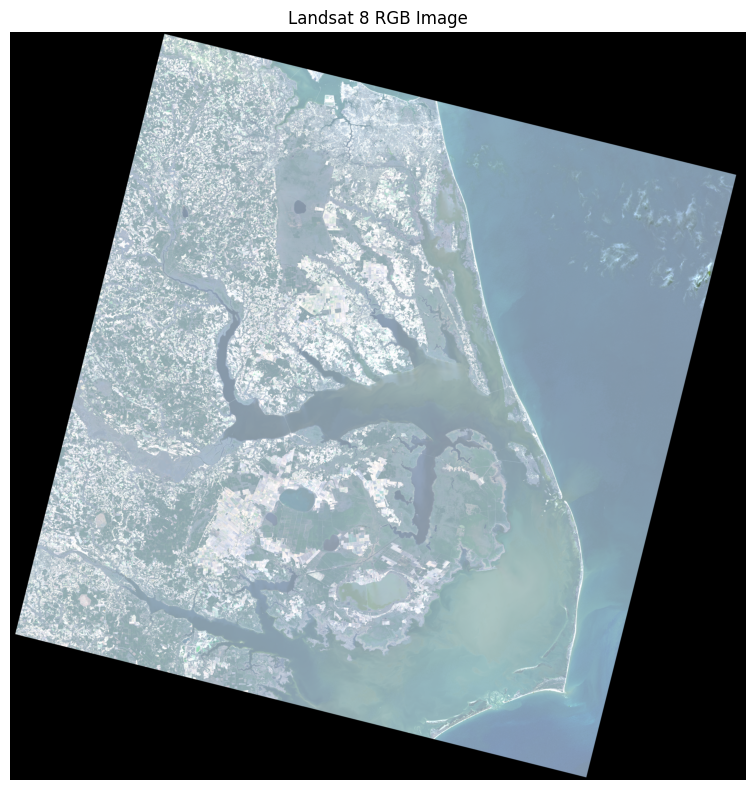

In [9]:
farq.plot_rgb(red, green, blue,
               title='Landsat 8 RGB Image',  # Title for the plot
               figsize=(10, 8),  # Width and height of figure in inches
               reflectance_scale=10000,  # Scale factor to convert DN to reflectance (0-1)
               gamma=0.8,  # Gamma correction for contrast adjustment
               percentile=98.0,  # Percentile for contrast stretching
               scale_factor=1.0)
farq.plt.show()

# INDICES

## NDWI

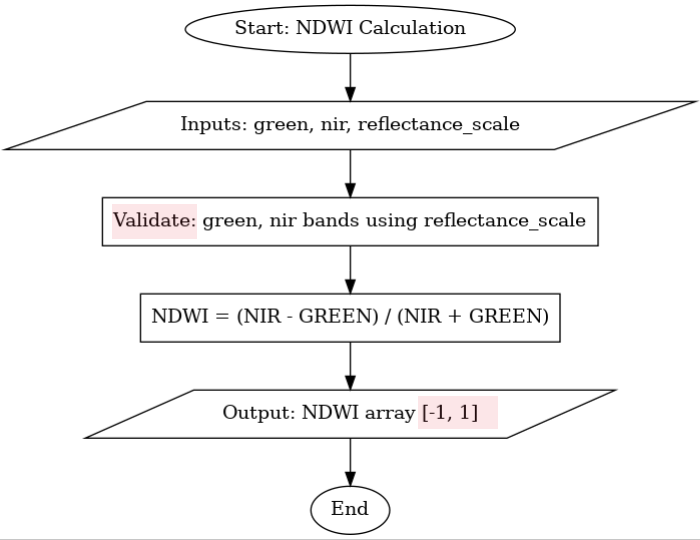


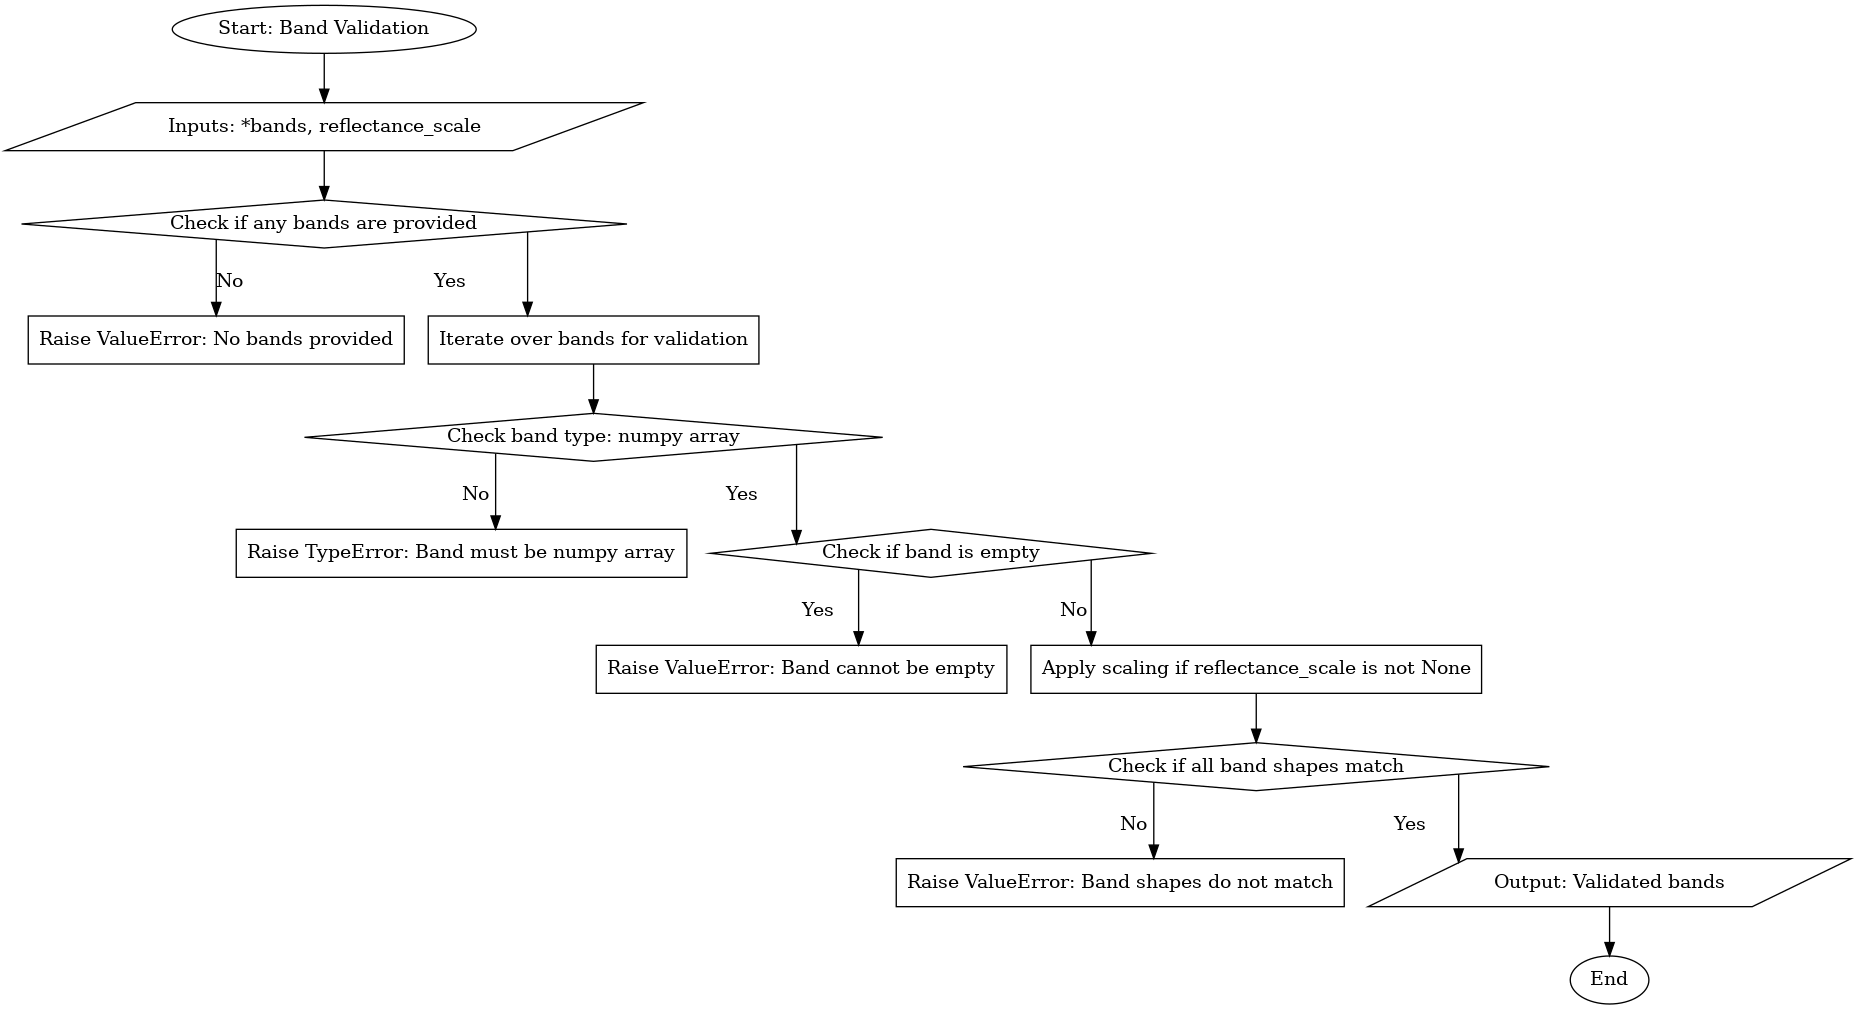

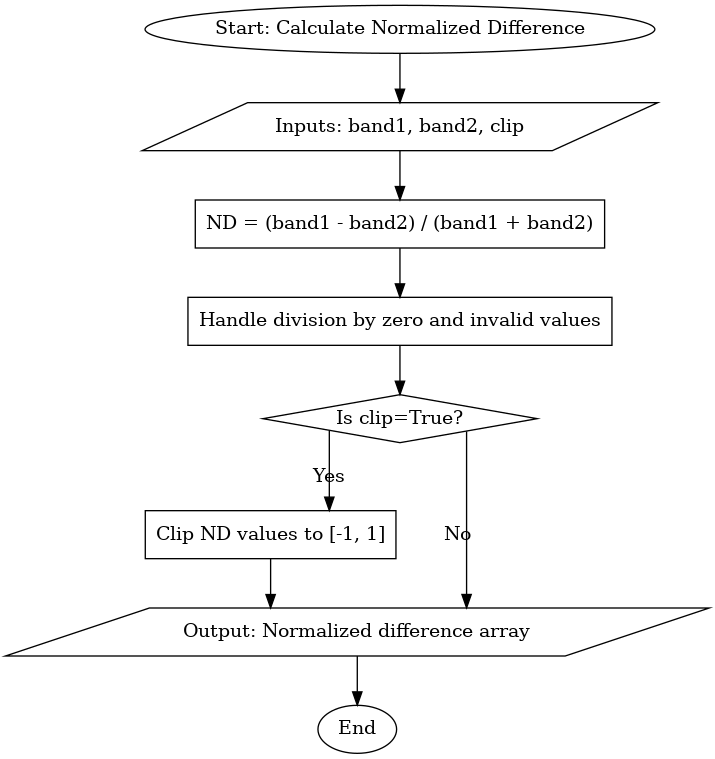

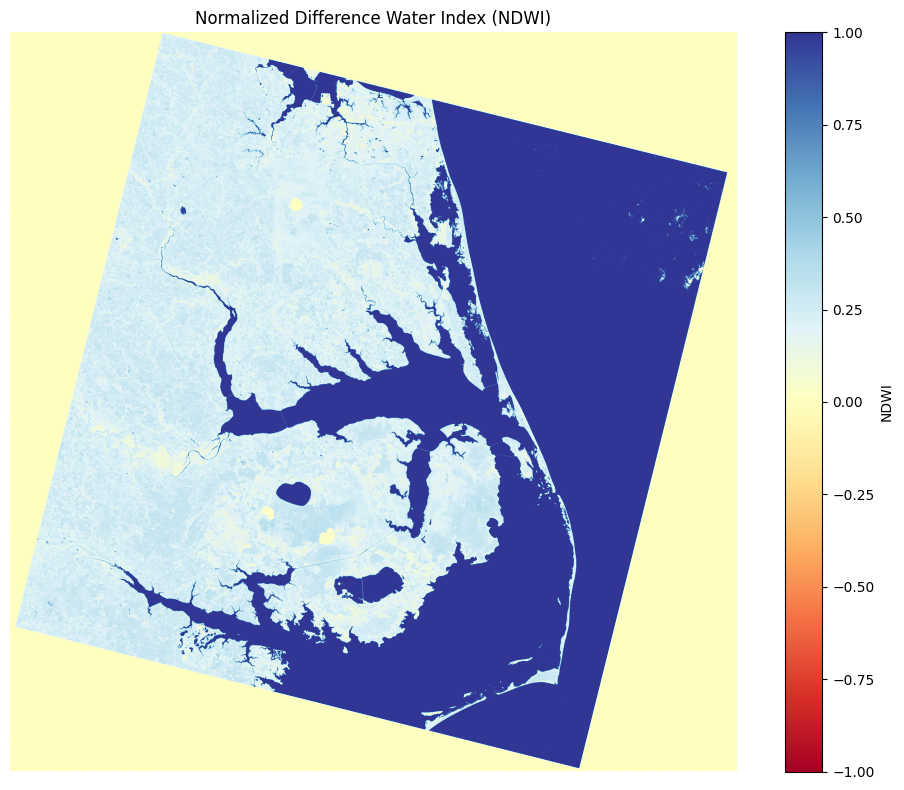

{'min': 0.0,
 'max': 1.0,
 'mean': 0.3831031273471101,
 'std': 0.4183360845088084,
 'median': 0.2213521857801244,
 'percentiles': {'0': 0.0,
  '25': 0.0,
  '50': 0.2213521857801244,
  '75': 1.0,
  '100': 1.0},
 'non_zero': 61242051,
 'zeros': 20645410,
 'nan': 0,
 'inf': 0,
 'valid': 61242051,
 'shape': (7891, 7761),
 'size': 61242051,
 'dtype': 'float64',
 'range': 1.0,
 'variance': 0.17500507960216088,
 'skewness': 0.6807066323790985,
 'kurtosis': -1.3176998949064174,
 'percentages': {'valid': 100.0,
  'nan': 0.0,
  'zeros': 33.71116685820989,
  'inf': 0.0}}

In [10]:
# Calculate and plot NDWI
ndwi = farq.ndwi(green, nir)

# Plot NDWI
farq.plot(ndwi,
          title='Normalized Difference Water Index (NDWI)',
          cmap='RdYlBu', 
          vmin=-1,
          vmax=1,
          colorbar_label='NDWI')
farq.plt.show()

# Get statistics of NDWI
farq.stats(ndwi)



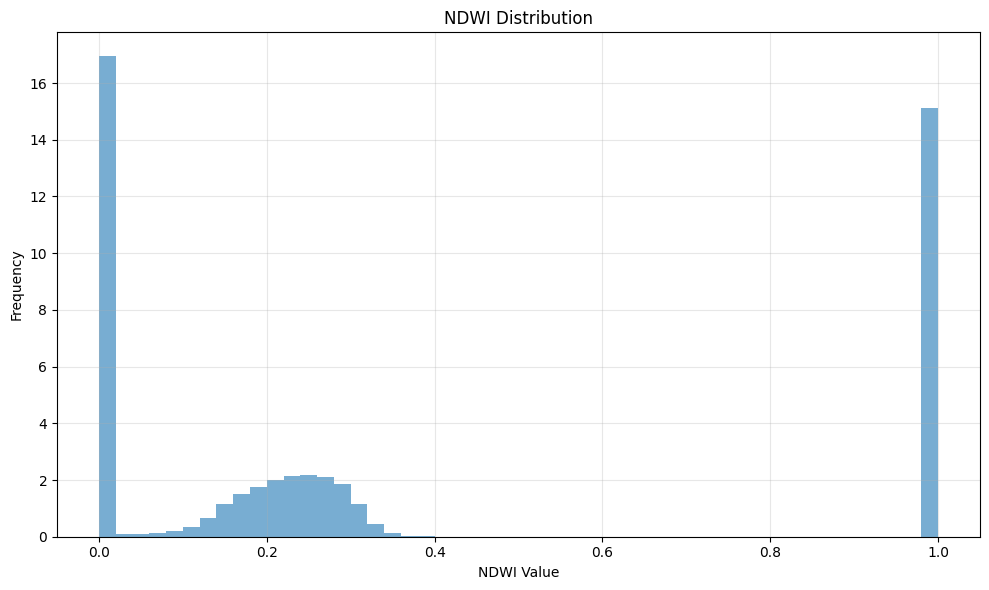

In [11]:
farq.hist(ndwi, 
          title='NDWI Distribution',
          xlabel='NDWI Value',
          ylabel='Frequency')
farq.plt.show()

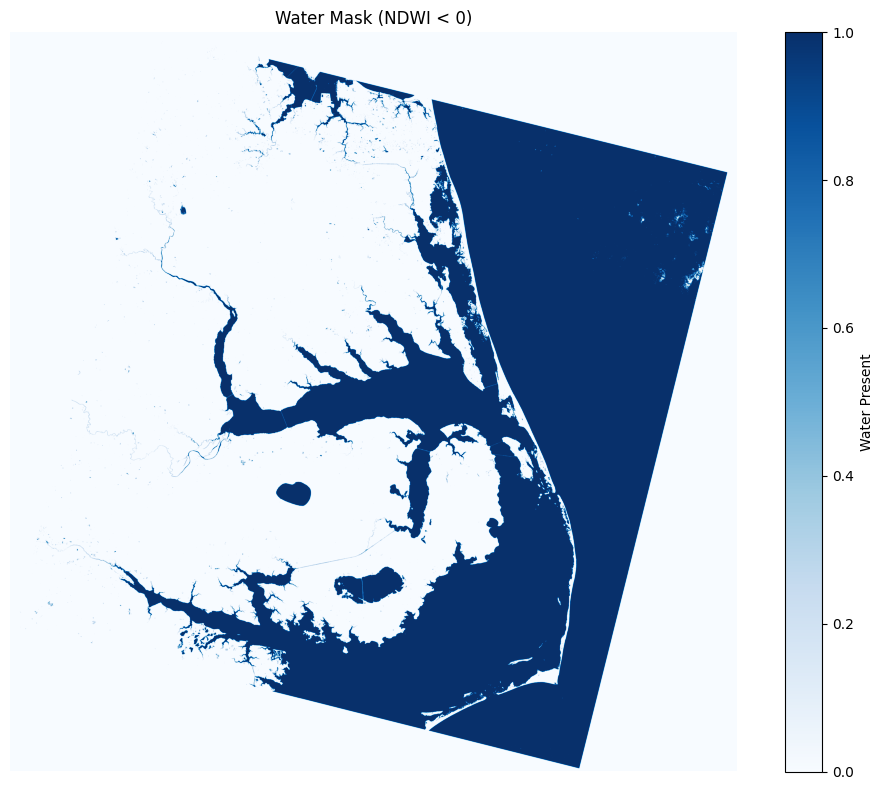

In [12]:
# Calculate NDWI
ndwi_result = farq.ndwi(green, nir, reflectance_scale=10000)

# Create water mask (water has NDWI < 0)
water_mask = ndwi_result < 0

# Visualize
farq.plot(water_mask, 
          title='Water Mask (NDWI < 0)',
          cmap='Blues',
          colorbar_label='Water Present')
farq.plt.show()


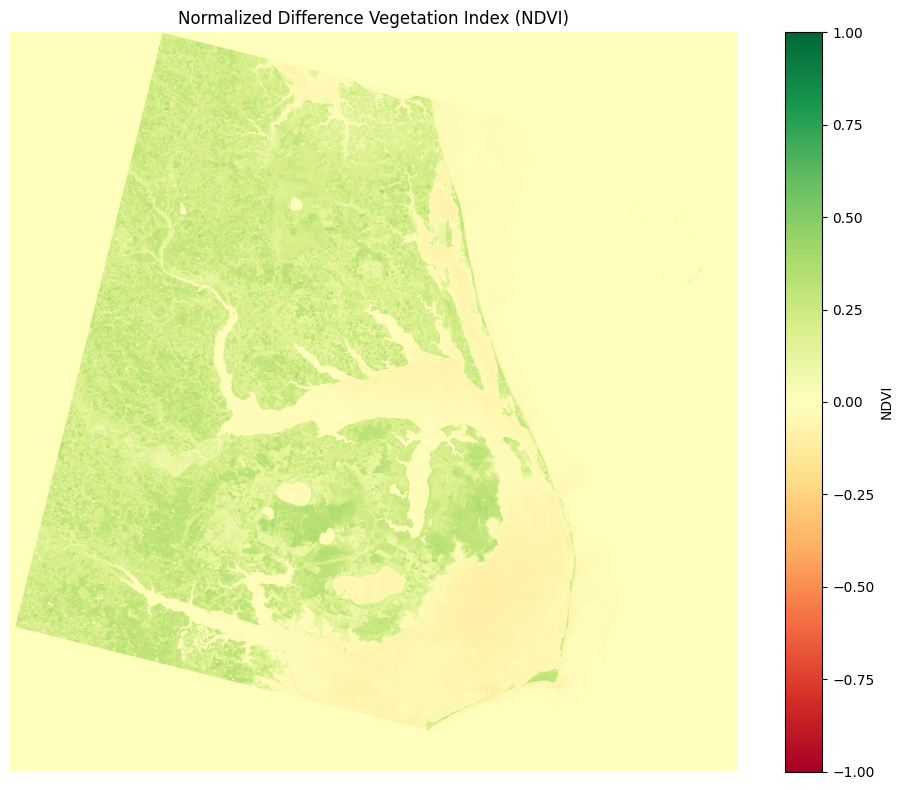

{'min': -0.30953763681036406,
 'max': 1.0,
 'mean': 0.07007675898937914,
 'std': 0.11858024000785254,
 'median': 0.0,
 'percentiles': {'0': -0.30953763681036406,
  '25': -0.0015153602424576248,
  '50': 0.0,
  '75': 0.1734196210842244,
  '100': 1.0},
 'non_zero': 61242051,
 'zeros': 20697140,
 'nan': 0,
 'inf': 0,
 'valid': 61242051,
 'shape': (7891, 7761),
 'size': 61242051,
 'dtype': 'float64',
 'range': 1.3095376368103642,
 'variance': 0.014061273320319914,
 'skewness': 0.8941595097528351,
 'kurtosis': -0.6427317515009778,
 'percentages': {'valid': 100.0,
  'nan': 0.0,
  'zeros': 33.795634963303236,
  'inf': 0.0}}

In [13]:
# Calculate NDVI
ndvi = farq.ndvi(nir, red, reflectance_scale=10000)

# Plot NDVI
farq.plot(ndvi,
          title='Normalized Difference Vegetation Index (NDVI)',
          cmap='RdYlGn',
          vmin=-1,
          vmax=1, 
          colorbar_label='NDVI')
farq.plt.show()

# Get statistics of NDVI
farq.stats(ndvi)


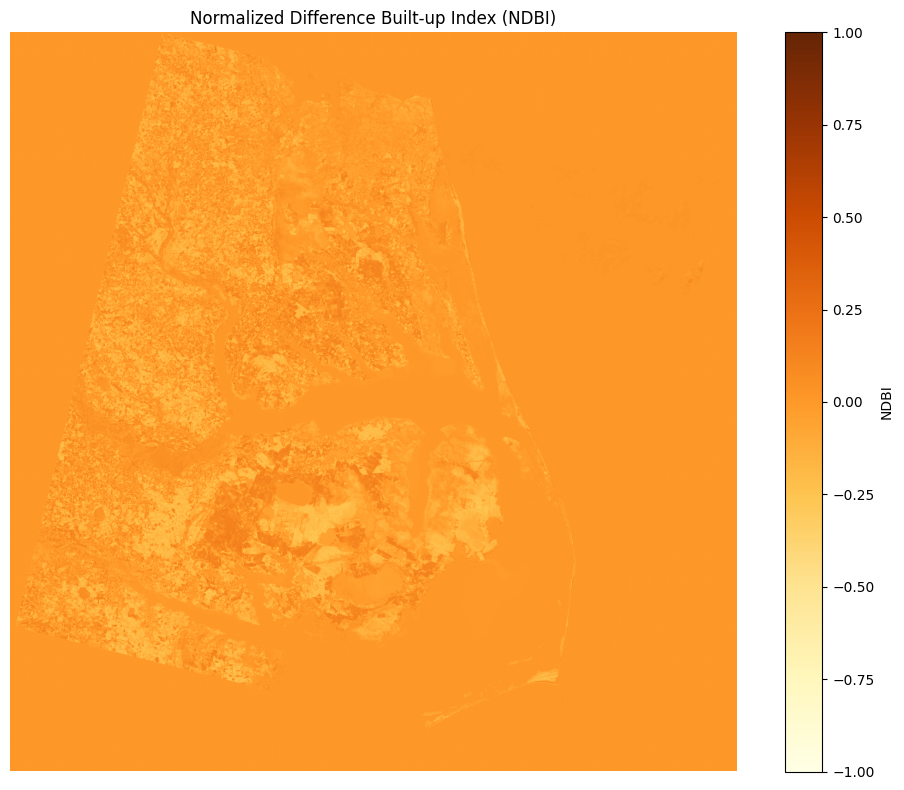

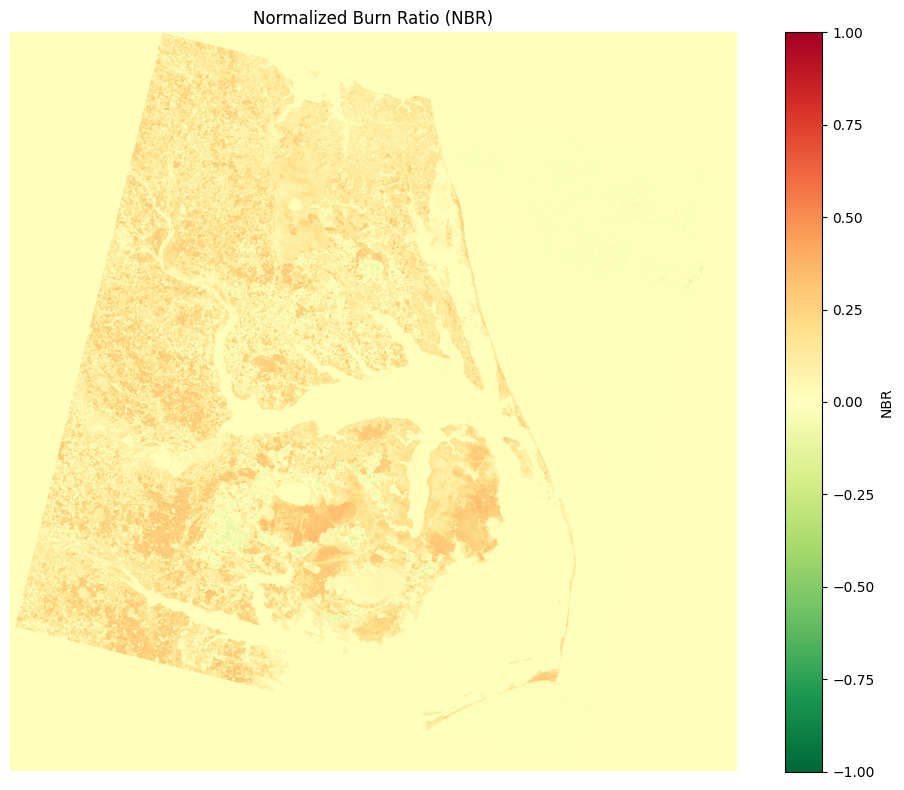

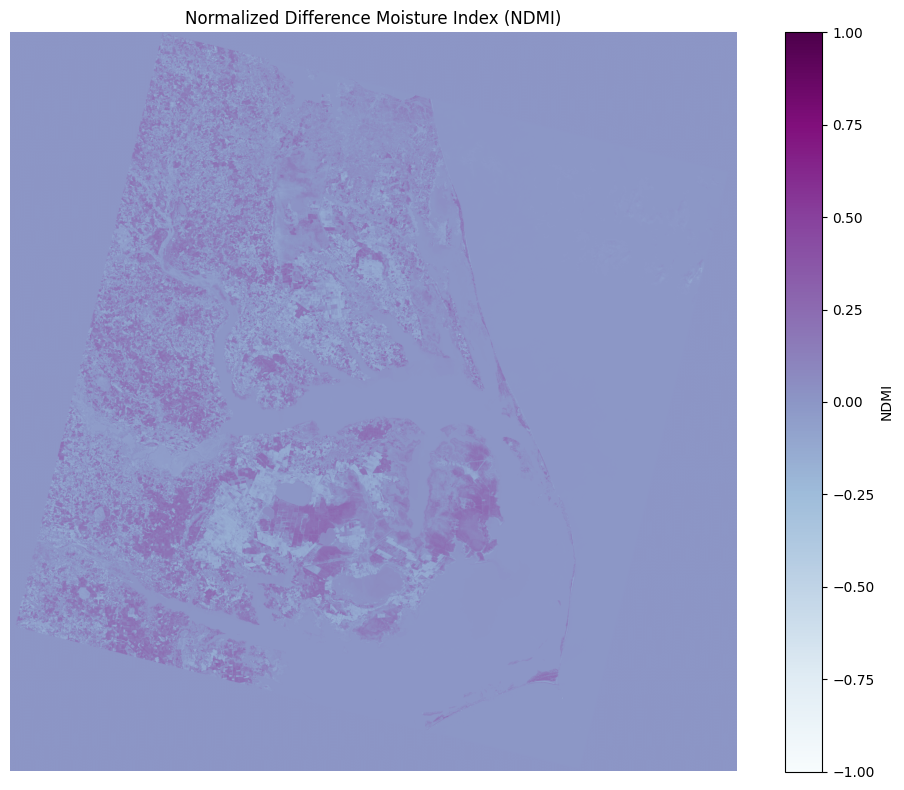

In [14]:
# Calculate other indices
ndbi = farq.ndbi(swir1, nir, reflectance_scale=10000)
nbr = farq.nbr(nir, swir2, reflectance_scale=10000)
ndmi = farq.ndmi(nir, swir1, reflectance_scale=10000)

# Plot NDBI - Using YlOrBr for built-up areas (higher values = more built-up)
farq.plot(ndbi,
          title='Normalized Difference Built-up Index (NDBI)', 
          cmap='YlOrBr',
          vmin=-1,
          vmax=1,
          colorbar_label='NDBI')
farq.plt.show()

# Plot NBR - Using RdYlGn_r for burn scars (lower values = more burned)
farq.plot(nbr,
          title='Normalized Burn Ratio (NBR)',
          cmap='RdYlGn_r',
          vmin=-1, 
          vmax=1,
          colorbar_label='NBR')
farq.plt.show()

# Plot NDMI - Using BuPu for moisture (higher values = more moisture)
farq.plot(ndmi,
          title='Normalized Difference Moisture Index (NDMI)',
          cmap='BuPu', 
          vmin=-1,
          vmax=1,
          colorbar_label='NDMI')
farq.plt.show()



# ---------------------------------------------------------------


# Water Change Detection Analysis

In this section, we'll analyze water body changes between 2015 and 2024 using Landsat 8 imagery. We'll use the following steps:

1. Load Landsat 8 bands:
   - Band 3 (Green) and Band 5 (NIR) for both 2015 and 2024
   - These bands are used to calculate NDWI (Normalized Difference Water Index)

2. Calculate NDWI for both dates:
   - NDWI = (Green - NIR)/(Green + NIR)
   - Higher NDWI values indicate higher likelihood of water
   - Typically, NDWI > 0 indicates water presence

3. Create water masks:
   - Apply threshold to NDWI to identify water bodies
   - Compare water extent between dates
   - Analyze changes in water coverage

This analysis will help us understand:
- Changes in water body extent
- New water formations
- Water losses
- Overall water dynamics in the study area


In [15]:
sea_b3_2015, _ = farq.read('sea\LC08_L2SP_174038_20150710_20200908_02_T1_SR_B3.TIF')
sea_b5_2015, _ = farq.read('sea\LC08_L2SP_174038_20150710_20200908_02_T1_SR_B5.TIF')
sea_b3_2024, _ = farq.read('sea\LC08_L2SP_174038_20240312_20240401_02_T1_SR_B3.TIF')
sea_b5_2024, _ = farq.read('sea\LC08_L2SP_174038_20240312_20240401_02_T1_SR_B5.TIF')


In [16]:
# Calculate NDWI for both dates
ndwi_2015 = farq.ndwi(sea_b3_2015, sea_b5_2015, reflectance_scale=10000)
ndwi_2024 = farq.ndwi(sea_b3_2024, sea_b5_2024, reflectance_scale=10000)


In [17]:
print("NDWI 2015 shape:", ndwi_2015.shape)
print("NDWI 2024 shape:", ndwi_2024.shape)

NDWI 2015 shape: (7711, 7561)
NDWI 2024 shape: (7711, 7551)


In [18]:
# Resample 2015 data to match 2024 shape
sea_b3_2015 = farq.resample(sea_b3_2015, sea_b3_2024.shape)
sea_b5_2015 = farq.resample(sea_b5_2015, sea_b5_2024.shape)

# Recalculate NDWI for 2015 with resampled data
ndwi_2015 = farq.ndwi(sea_b3_2015, sea_b5_2015, reflectance_scale=10000)


C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\rasterio\io.py:143: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  rd = writer(


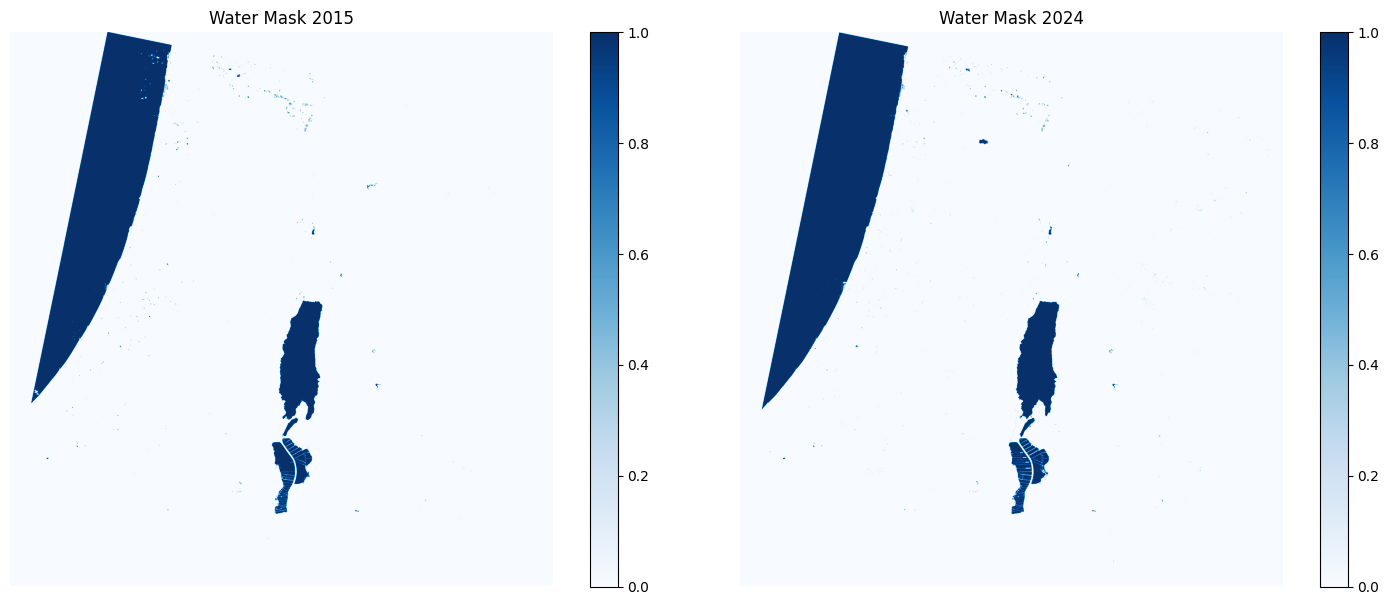

In [19]:
# Create water masks using NDWI threshold
# Values < 0 typically indicate water for Landsat 8 NDWI
water_mask_2015 = ndwi_2015 < 0
water_mask_2024 = ndwi_2024 < 0

# Plot water masks
farq.compare(water_mask_2015, water_mask_2024,
             title1='Water Mask 2015',
             title2='Water Mask 2024',
             cmap='Blues',
             vmin=0,
             vmax=1)
farq.plt.show()

# Get water mask statistics
water_stats_2015 = farq.water_stats(water_mask_2015)
water_stats_2024 = farq.water_stats(water_mask_2024)



In [20]:
water_stats_2015

{'total_area': 4355.8155,
 'coverage_percent': 8.312119784917883,
 'num_water_bodies': 1961,
 'mean_body_size': 2.220089449541285,
 'largest_body': 3452.4494999999997}

In [21]:
water_stats_2024

{'total_area': 4636.3158,
 'coverage_percent': 8.847393166746246,
 'num_water_bodies': 6816,
 'mean_body_size': 0.6801108698841132,
 'largest_body': 3745.7684999999997}

In [22]:
farq.water_change(water_mask_2015,water_mask_2024)

{'gained_area': 722.3985,
 'lost_area': 441.8982,
 'net_change': 280.50030000000004,
 'change_percent': 6.439673581215735,
 'change_mask': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'stable_water': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}